<a href="https://colab.research.google.com/github/BUGATAASHWINI/ML-Training-/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# 1. Load dataset
file_path = '/content/Titanic-Dataset.csv'
df = pd.read_csv(file_path)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
print(df.head())
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Handling missing values


In [12]:
df['Age'] = df['Age'].fillna(np.nanmedian(df['Age']))
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
df['Embarked'] = df['Embarked'].replace(np.nan, df['Embarked'].mode()[0])

In [14]:
df.drop(columns=['Cabin'], inplace=True)

In [15]:
print("\nMissing values after handling:\n", df.isnull().sum())


Missing values after handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Categorical into Numerical


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male = 1, female = 0
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

Standardization


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols].head())

        Age      Fare     SibSp     Parch
0 -0.565736 -0.502445  0.432793 -0.473674
1  0.663861  0.786845  0.432793 -0.473674
2 -0.258337 -0.488854 -0.474545 -0.473674
3  0.433312  0.420730  0.432793 -0.473674
4  0.433312 -0.486337 -0.474545 -0.473674


Normalize


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols].head())

        Age      Fare  SibSp  Parch
0  0.271174  0.014151  0.125    0.0
1  0.472229  0.139136  0.125    0.0
2  0.321438  0.015469  0.000    0.0
3  0.434531  0.103644  0.125    0.0
4  0.434531  0.015713  0.000    0.0


Visualize


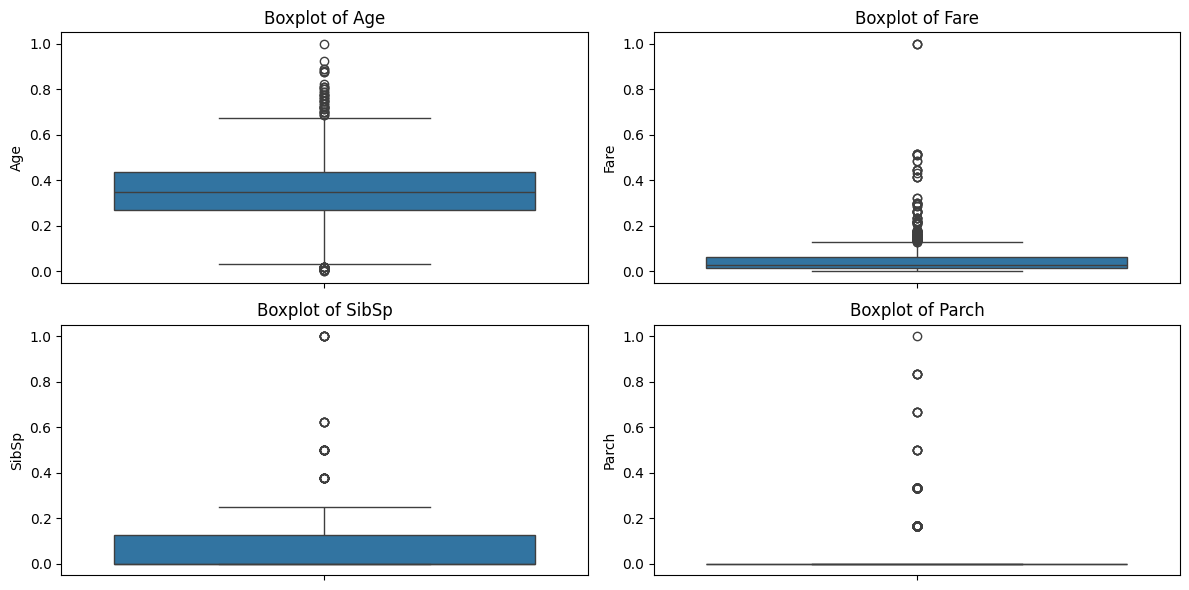

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


REmoving outliers


In [22]:
import numpy as np

def remove_outliers_iqr(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)
print("Shape after outlier removal:", df.shape)
df

Shape after outlier removal: (384, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0.0,0.0,STON/O2. 3101282,0.015469,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0.0,0.0,373450,0.015713,False,True
5,6,0,3,"Moran, Mr. James",1,0.346569,0.0,0.0,330877,0.016510,True,False
12,13,0,3,"Saundercock, Mr. William Henry",1,0.246042,0.0,0.0,A/5. 2151,0.015713,False,True
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",0,0.170646,0.0,0.0,350406,0.015330,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",0,0.271174,0.0,0.0,7552,0.020527,False,True
883,884,0,2,"Banfield, Mr. Frederick James",1,0.346569,0.0,0.0,C.A./SOTON 34068,0.020495,False,True
884,885,0,3,"Sutehall, Mr. Henry Jr",1,0.308872,0.0,0.0,SOTON/OQ 392076,0.013761,False,True
886,887,0,2,"Montvila, Rev. Juozas",1,0.334004,0.0,0.0,211536,0.025374,False,True
